In [3]:
import sys
print(sys.executable)

c:\Users\hp\AppData\Local\Programs\Python\Python39\python.exe


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
pip install --upgrade bottleneck


In [16]:
# Configurations
sns.set(style="whitegrid")  # Seaborn plot style
plt.rcParams["figure.figsize"] = (12, 6)  # Set default figure size

In [17]:
# Load datasets
benin_path = "../data/raw/benin-malanville.csv"
sierraleone_path = "../data/raw/sierraleone-bumbuna.csv"
togo_path = "../data/raw/togo-dapaong_qc.csv"

In [18]:
benin_data = pd.read_csv(benin_path)
sierraleone_data = pd.read_csv(sierraleone_path)
togo_data = pd.read_csv(togo_path)

In [19]:
# Utility Functions
def data_overview(df, name):
    """Prints an overview of the dataset, including shape and data types."""
    print(f"\n{name} Dataset Overview:")
    print(f"Shape: {df.shape}")
    print("Info:")
    print(df.info())
    print("\nSample Rows:")
    print(df.head())

def missing_values(df, name):
    """Prints missing value counts for each column."""
    print(f"\nMissing Values - {name}:")
    print(df.isnull().sum())

def plot_time_series(df, column, label, time_column='Timestamp'):
    """Plots a time series for a specific column."""
    plt.plot(pd.to_datetime(df[time_column]), df[column], label=label)

def correlation_heatmap(df, name):
    """Plots a correlation heatmap for the dataset."""
    if 'Timestamp' in df.columns:
        df['timestamp_numeric'] = pd.to_datetime(df['Timestamp'], errors='coerce').astype('int64') // 10**9
    # Select only numeric columns
    numeric_data = df.select_dtypes(include=[np.number])
    
    if numeric_data.empty:
        print(f"No numeric data in {name} dataset to compute correlations.")
        return
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"{name} Correlation Matrix")
    plt.show()

In [20]:
# 1. Data Overview
data_overview(benin_data, "Benin")
data_overview(sierraleone_data, "Sierra Leone")
data_overview(togo_data, "Togo")


Benin Dataset Overview:
Shape: (525600, 19)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 n

In [21]:
# 2. Missing Values
missing_values(benin_data, "Benin")
missing_values(sierraleone_data, "Sierra Leone")
missing_values(togo_data, "Togo")


Missing Values - Benin:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Missing Values - Sierra Leone:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Miss

In [22]:
# 3. Summary Statistics
print("\nSummary Statistics - Benin:")
print(benin_data.describe())
print("\nSummary Statistics - Sierra Leone:")
print(sierraleone_data.describe())
print("\nSummary Statistics - Togo:")
print(togo_data.describe())


Summary Statistics - Benin:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25% 

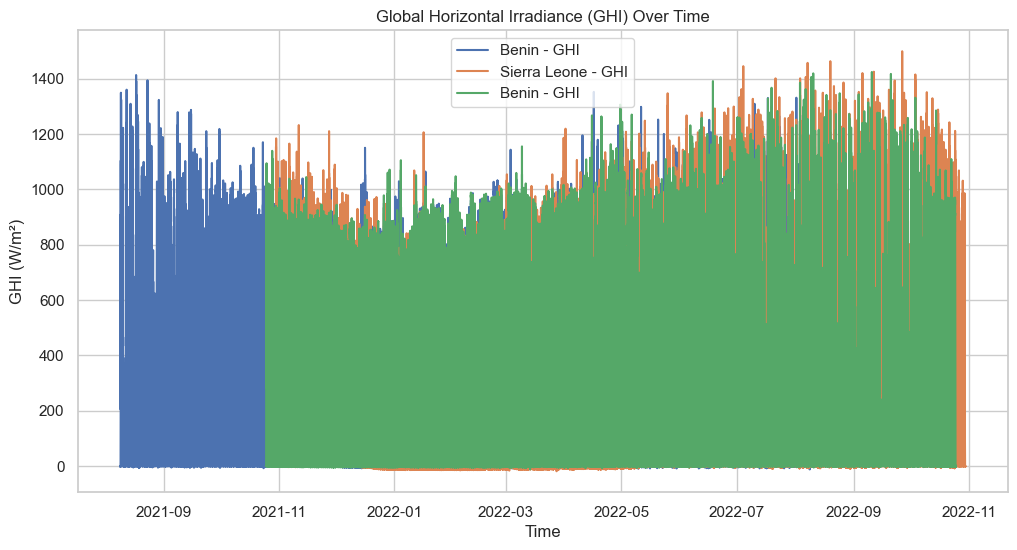

In [23]:
# 4. Time Series Analysis
## Plot GHI for both datasets
plt.figure(figsize=(12, 6))
plot_time_series(benin_data, 'GHI', label="Benin - GHI")
plot_time_series(sierraleone_data, 'GHI', label="Sierra Leone - GHI")
plot_time_series(togo_data, 'GHI' , label= "Benin - GHI")
plt.title("Global Horizontal Irradiance (GHI) Over Time")
plt.xlabel("Time")
plt.ylabel("GHI (W/m²)")
plt.legend()
plt.show()


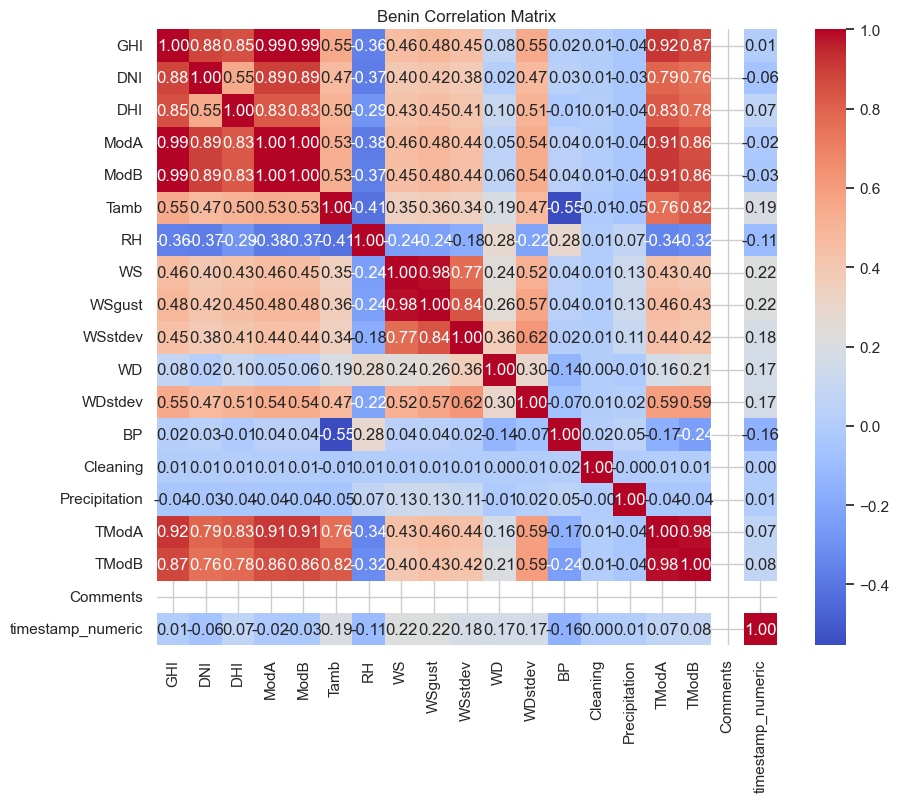

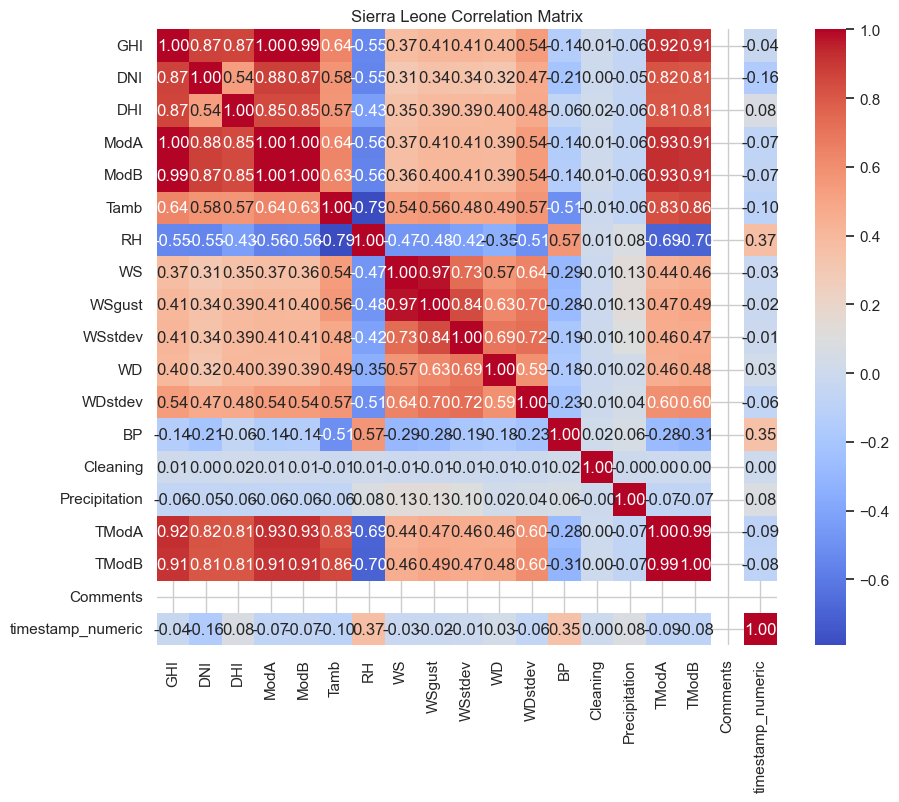

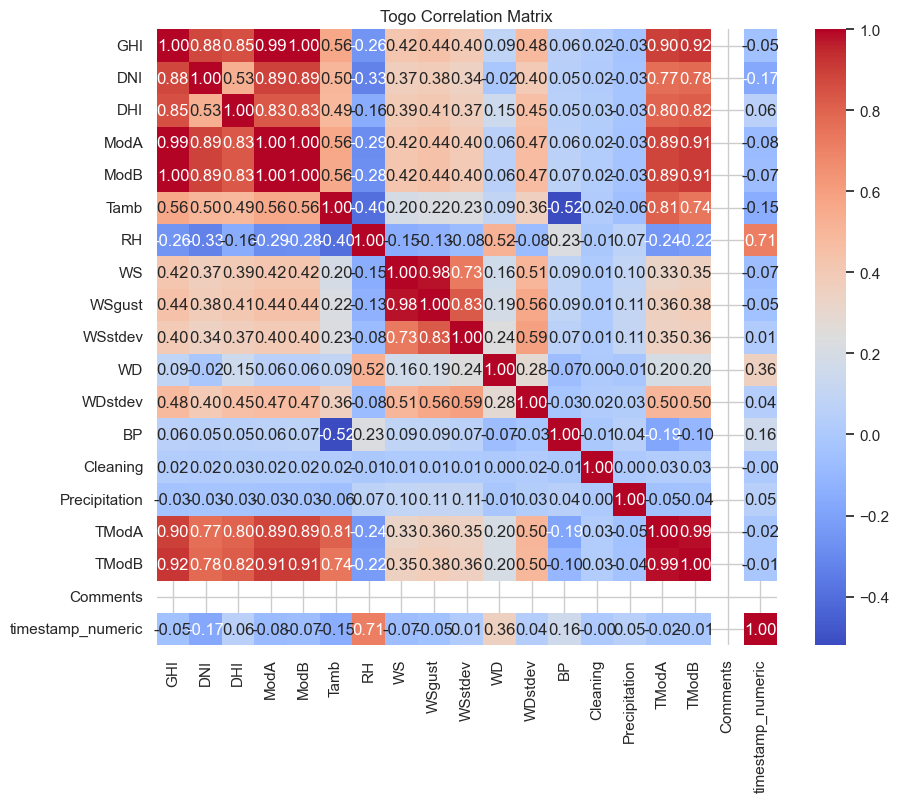

In [24]:
# 5. Correlation Analysis
correlation_heatmap(benin_data, "Benin")
correlation_heatmap(sierraleone_data, "Sierra Leone")
correlation_heatmap(togo_data, "Togo")

In [25]:
# 6. Outlier Detection using Z-Score
def detect_outliers(df, column):
    """Detects outliers using Z-scores."""
    z_scores = zscore(df[column].dropna())
    return df[np.abs(z_scores) > 3]

outliers_benin = detect_outliers(benin_data, 'GHI')
print(f"\nOutliers in Benin GHI:\n{outliers_benin}")

outliers_sierraleone = detect_outliers(sierraleone_data, 'GHI')
print(f"\nOutliers in Sierra Leone GHI:\n{outliers_sierraleone}")

outliers_togo = detect_outliers(togo_data, 'GHI')
print(f"\nOutliers in Togo GHI: \n{outliers_benin}")


Outliers in Benin GHI:
               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
671     2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
674     2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
676     2021-08-09 11:17  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0   
849     2021-08-09 14:10  1253.0  714.8  552.5  1156.0  1155.0  31.0  64.2   
850     2021-08-09 14:11  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
517777  2022-08-03 13:38  1268.0  652.5  612.1  1163.0  1150.0  30.1  70.7   
520659  2022-08-05 13:40  1280.0  778.5  497.2  1168.0  1161.0  29.0  70.3   
520696  2022-08-05 14:17  1244.0  745.2  530.4  1126.0  1118.0  30.8  64.3   
522074  2022-08-06 13:15  1262.0  772.4  475.8  1166.0  1153.0  31.1  66.0   
522075  2022-08-06 13:16  1289.0  758.1  519.2  1191.0  1179.0  31.4  65.9   

         WS  WSgust  WSstdev     WD  WD

In [26]:
# 7. Cleaning Data
## Handle missing values and save cleaned data
def clean_data(df, name):
    """Cleans the dataset by handling missing values."""
    cleaned_df = df.dropna()
    cleaned_path = f"../data/processed/{name}_cleaned.csv"
    cleaned_df.to_csv(cleaned_path, index=False)
    print(f"\nCleaned dataset saved to {cleaned_path}")
    return cleaned_df

benin_data_cleaned = clean_data(benin_data, "benin")
sierraleone_data_cleaned = clean_data(sierraleone_data, "sierraleone")
togo_data_cleaned = clean_data(togo_data, "togo")



Cleaned dataset saved to ../data/processed/benin_cleaned.csv

Cleaned dataset saved to ../data/processed/sierraleone_cleaned.csv

Cleaned dataset saved to ../data/processed/togo_cleaned.csv


C:\Users\hp\AppData\Local\Temp\ipykernel_15664\3548497540.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


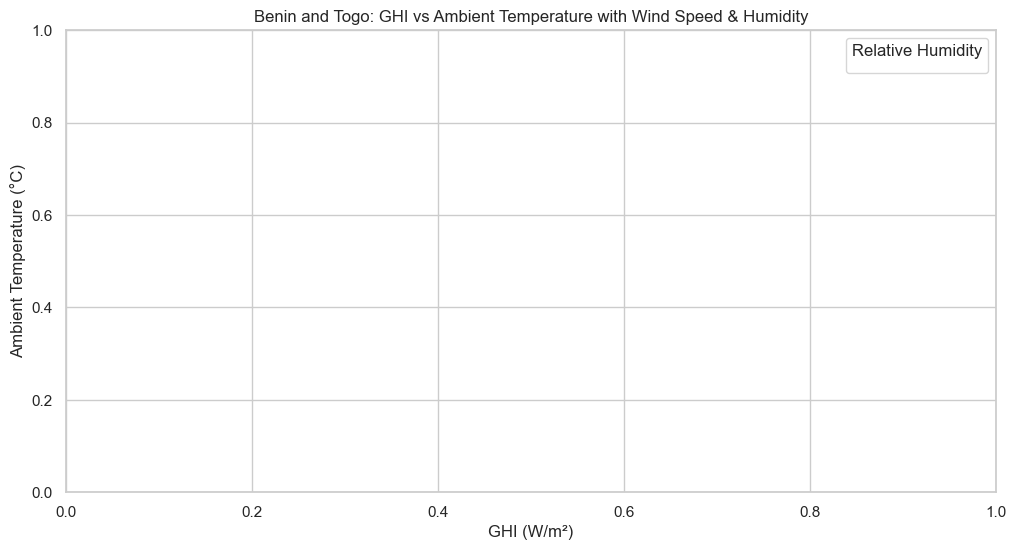

In [27]:
# 8. Advanced Visualization: Bubble Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=togo_data_cleaned,
    x='GHI', y='Tamb', size='WS', hue='RH', alpha=0.6,
    sizes=(40, 400), palette="viridis"
)

plt.title("Benin and Togo: GHI vs Ambient Temperature with Wind Speed & Humidity")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Ambient Temperature (°C)")
plt.legend(title="Relative Humidity")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_15664\2759735288.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = benin_data.resample('M').mean()


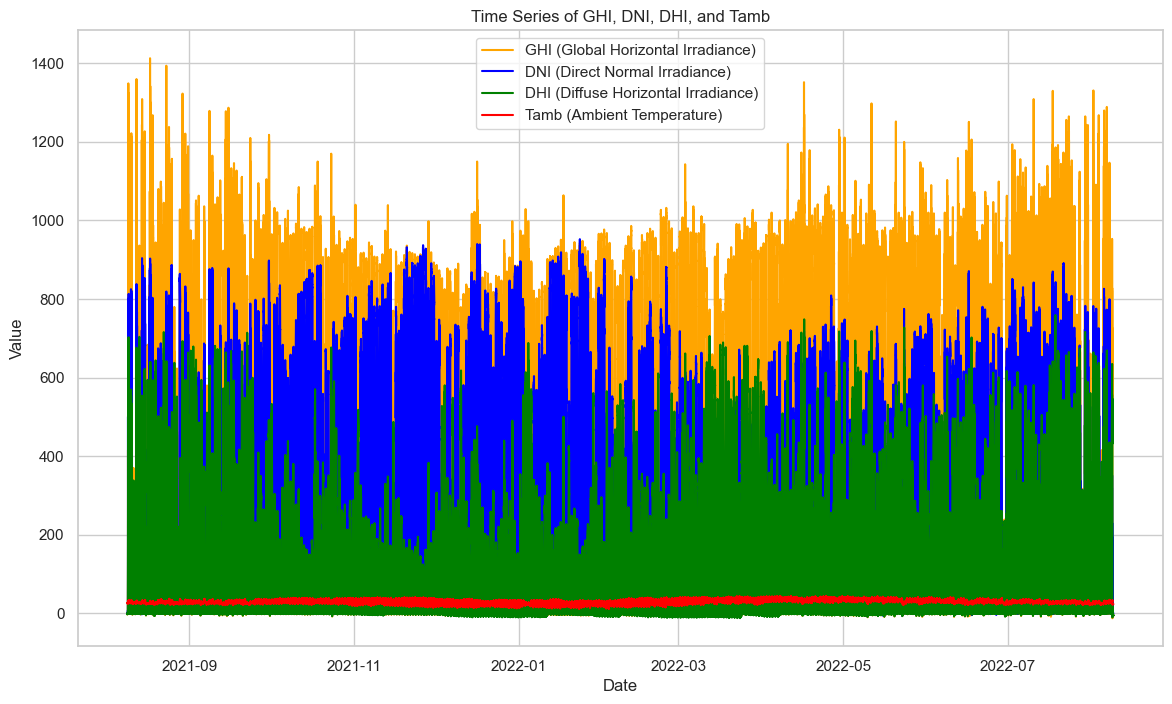

<Figure size 1400x800 with 0 Axes>

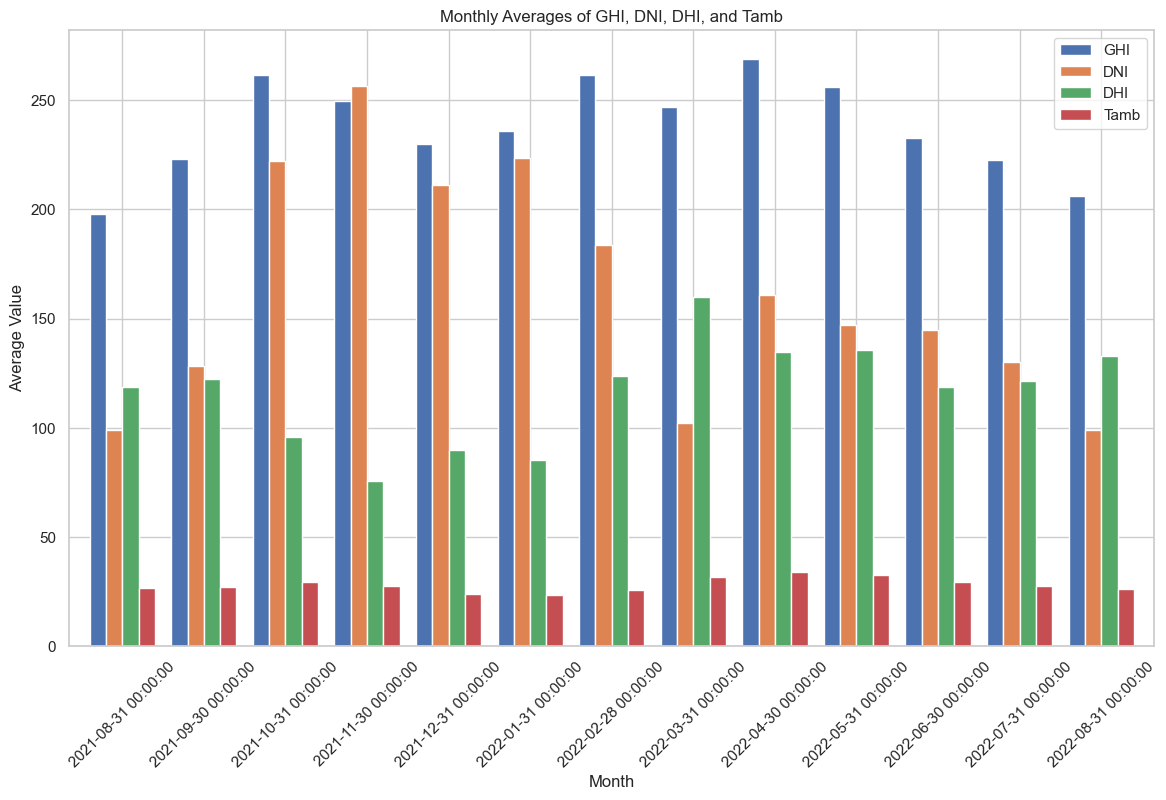

<Figure size 1400x800 with 0 Axes>

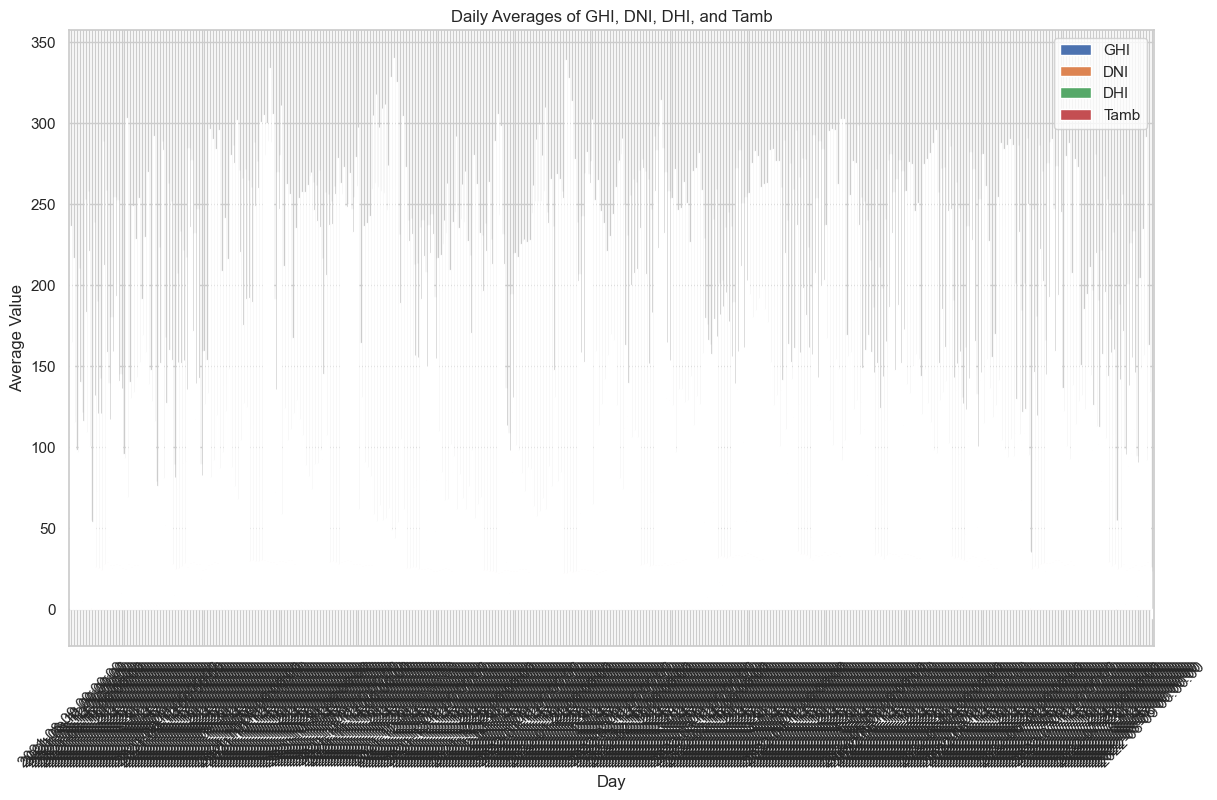

Anomalies in GHI:                         GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
Timestamp                                                                    
2021-08-09 09:22:00   909.0  679.7  467.4   818.0   823.0  27.1  84.0  3.3   
2021-08-09 10:16:00  1059.0  642.9  533.6   978.0   981.0  28.1  79.0  2.7   
2021-08-09 10:18:00  1088.0  725.3  494.8  1009.0  1015.0  28.7  77.0  4.5   
2021-08-09 10:19:00  1104.0  758.8  481.9  1020.0  1025.0  28.9  76.3  4.3   
2021-08-09 10:20:00  1075.0  751.2  457.6   993.0   999.0  28.8  76.6  3.6   
...                     ...    ...    ...     ...     ...   ...   ...  ...   
2022-08-08 12:13:00   932.0  304.0  620.1   868.0   865.0  30.3  72.4  4.1   
2022-08-08 12:14:00   953.0  347.6  598.4   887.0   883.0  30.2  73.0  4.1   
2022-08-08 12:15:00   949.0  350.9  590.3   883.0   879.0  30.3  72.7  4.1   
2022-08-08 12:16:00   917.0  316.9  591.9   856.0   852.0  30.4  73.1  3.8   
2022-08-08 12:17:00   933.0  321.6  604.2   87

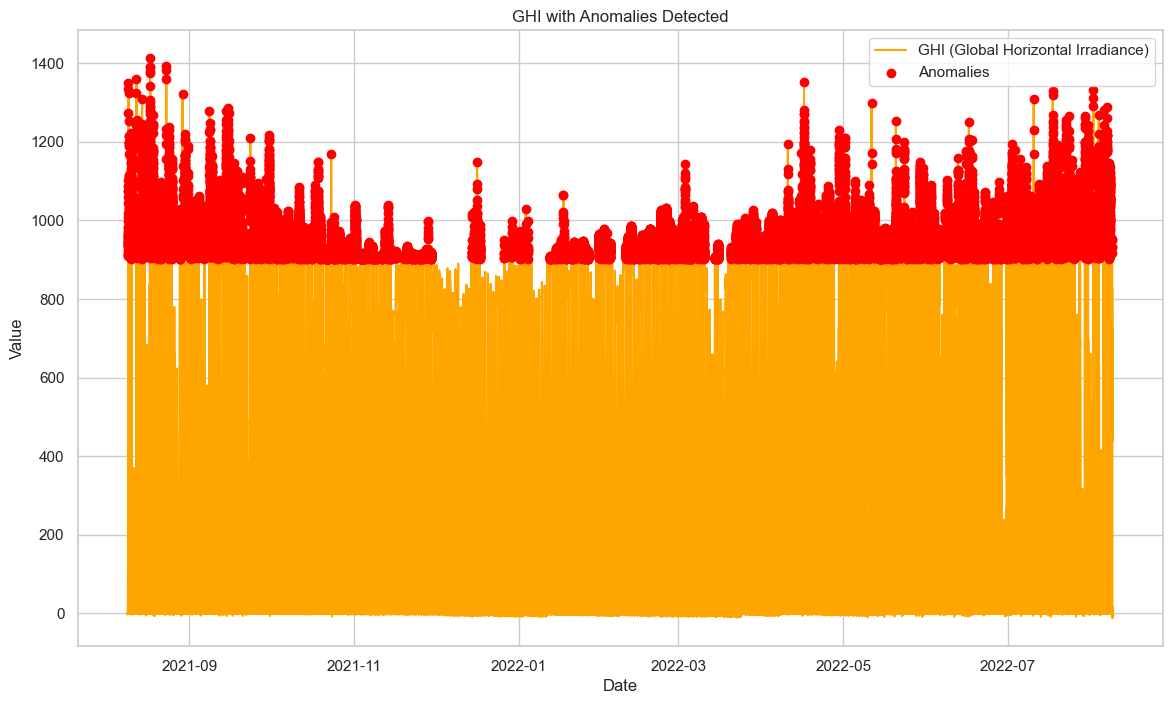

In [28]:
benin_data['Timestamp'] = pd.to_datetime(benin_data['Timestamp'])

# Set Timestamp as index for easier resampling and time series analysis
benin_data.set_index('Timestamp', inplace=True)

# Resample by day to get daily average for each variable
daily_avg = benin_data.resample('D').mean()

# Resample by month to get monthly average for each variable
monthly_avg = benin_data.resample('M').mean()

# 1. Plot Line Chart: GHI, DNI, DHI, and Tamb over Time (Line Chart)
plt.figure(figsize=(14, 8))
plt.plot(benin_data.index, benin_data['GHI'], label='GHI (Global Horizontal Irradiance)', color='orange')
plt.plot(benin_data.index, benin_data['DNI'], label='DNI (Direct Normal Irradiance)', color='blue')
plt.plot(benin_data.index, benin_data['DHI'], label='DHI (Diffuse Horizontal Irradiance)', color='green')
plt.plot(benin_data.index, benin_data['Tamb'], label='Tamb (Ambient Temperature)', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot Monthly Averages (Bar Chart)
plt.figure(figsize=(14, 8))
monthly_avg[['GHI', 'DNI', 'DHI', 'Tamb']].plot(kind='bar', width=0.8, figsize=(14, 8))
plt.title('Monthly Averages of GHI, DNI, DHI, and Tamb')
plt.ylabel('Average Value')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

# 3. Plot Daily Averages (Bar Chart)
plt.figure(figsize=(14, 8))
daily_avg[['GHI', 'DNI', 'DHI', 'Tamb']].plot(kind='bar', width=0.8, figsize=(14, 8))
plt.title('Daily Averages of GHI, DNI, DHI, and Tamb')
plt.ylabel('Average Value')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.show()

# 4. Anomaly Detection: Identify Peaks or Unusual Fluctuations (Optional)
# Simple approach: detect values that are more than 2 standard deviations from the mean
def detect_anomalies(benin_data, column):
    mean = benin_data[column].mean()
    std = benin_data[column].std()
    threshold_high = mean + 2 * std
    threshold_low = mean - 2 * std
    anomalies = benin_data[(benin_data[column] > threshold_high) | (benin_data[column] < threshold_low)]
    return anomalies

# Detect anomalies for GHI
anomalies_ghi = detect_anomalies(benin_data, 'GHI')
print(f"Anomalies in GHI: {anomalies_ghi}")

# Plot GHI anomalies
plt.figure(figsize=(14, 8))
plt.plot(benin_data.index, benin_data['GHI'], label='GHI (Global Horizontal Irradiance)', color='orange')
plt.scatter(anomalies_ghi.index, anomalies_ghi['GHI'], color='red', label='Anomalies', zorder=5)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('GHI with Anomalies Detected')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
print(benin_data.columns)

Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments', 'timestamp_numeric'],
      dtype='object')


In [31]:
def generate_correlation_matrix(df, columns):
    """
    Generates a correlation matrix heatmap for the specified columns.

    Args:
        df (pd.DataFrame): The dataset.
        columns (list): List of columns to include in the correlation matrix.

    Returns:
        None
    """
    # Select only the specified columns
    corr_df = df[columns].corr()

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()


In [32]:
def generate_pair_plot(df, columns):
    """
    Generates a pair plot (scatter plot matrix) for the specified columns.

    Args:
        df (pd.DataFrame): The dataset.
        columns (list): List of columns to include in the pair plot.

    Returns:
        None
    """
    sns.pairplot(df[columns], diag_kind="kde", corner=True)
    plt.title("Pair Plot (Scatter Plot Matrix)")
    plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

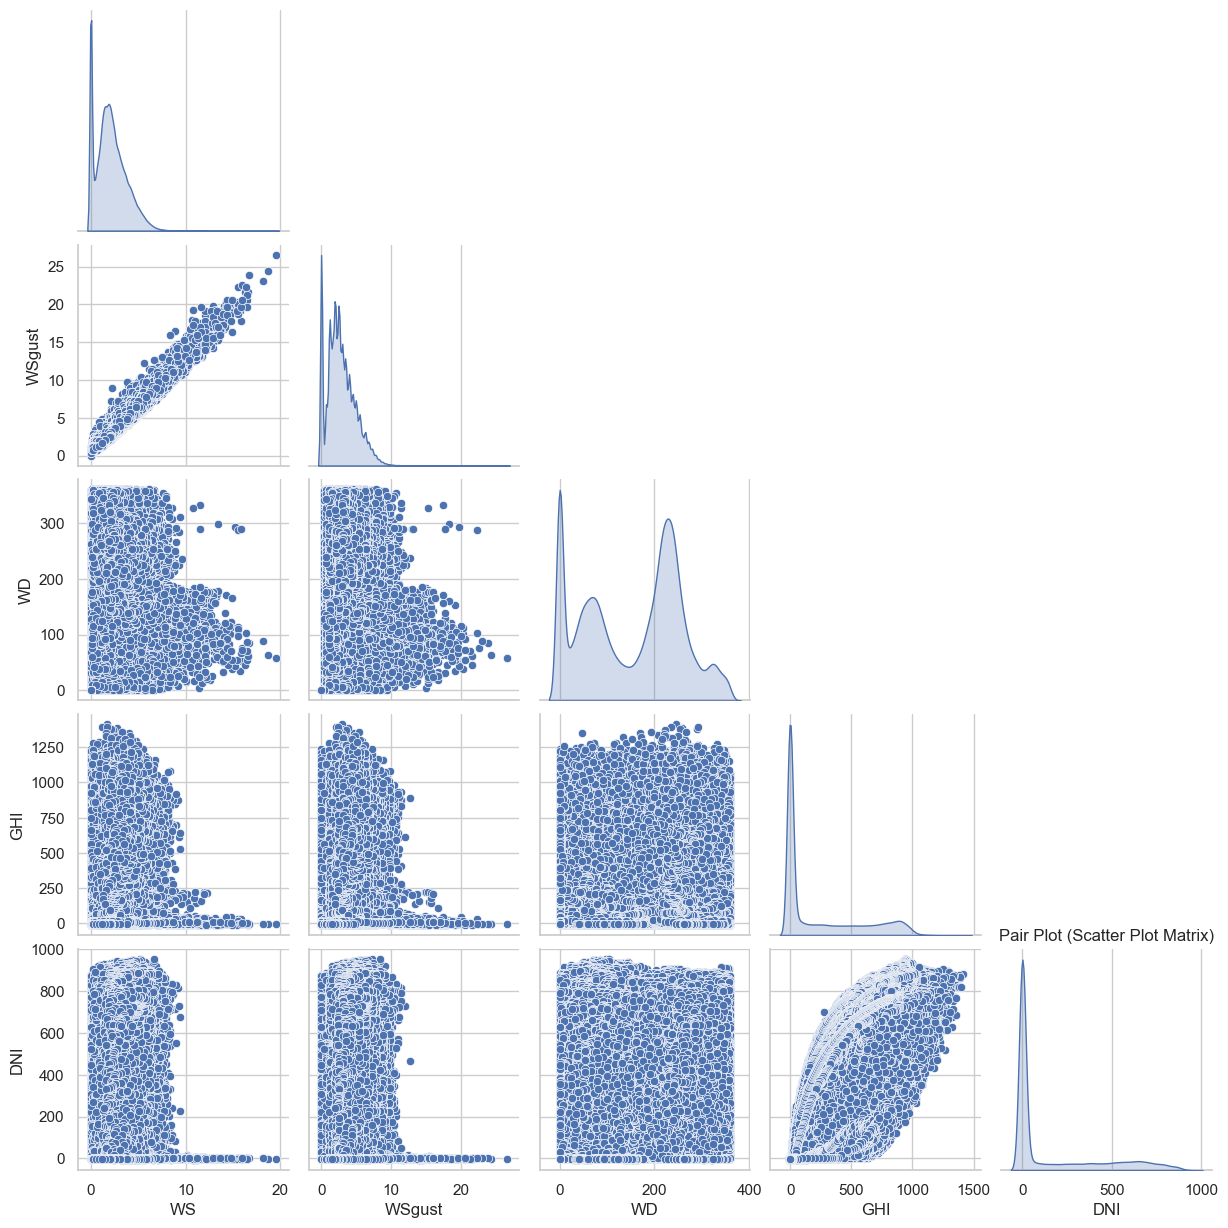

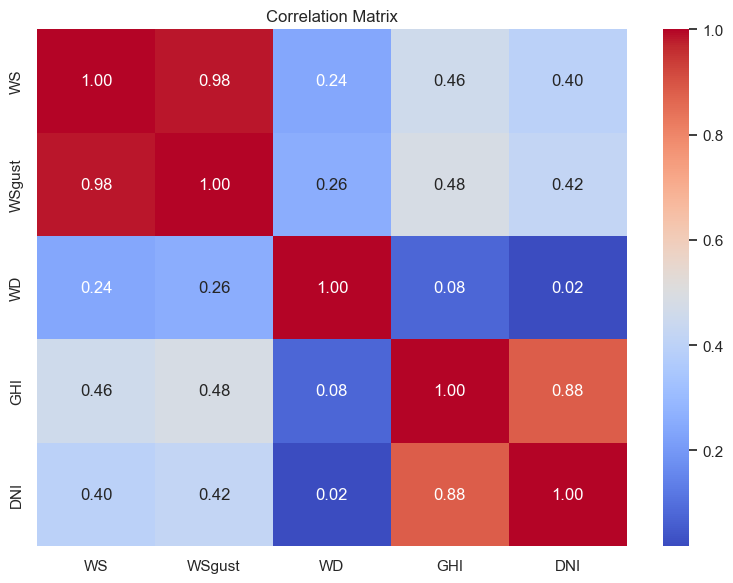

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

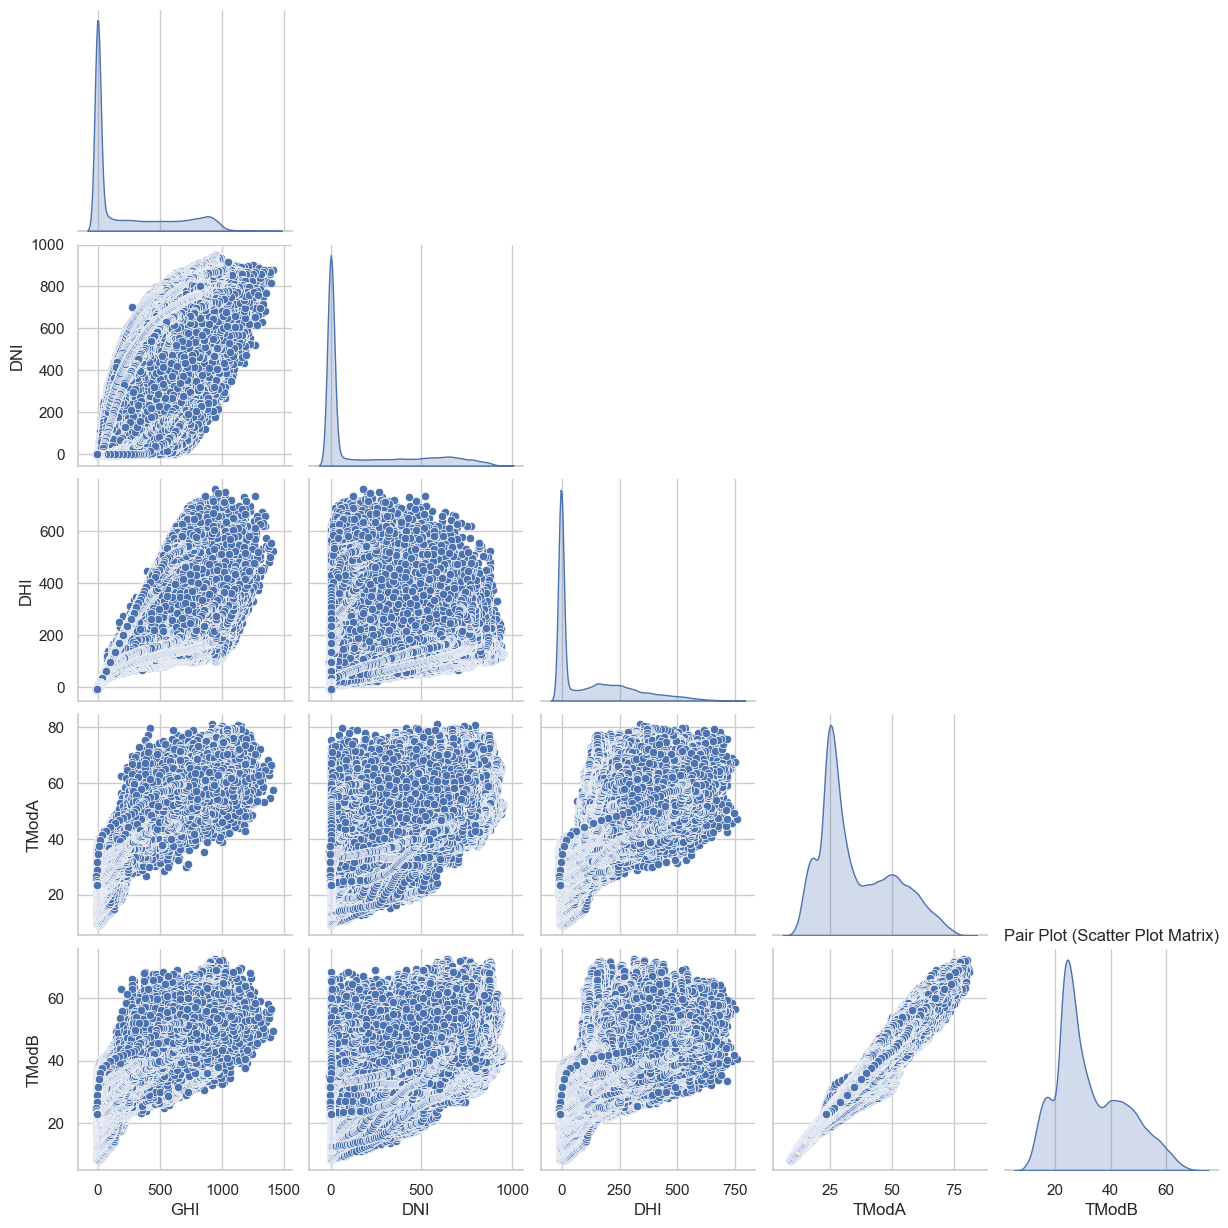

In [35]:
wind_columns = ['WS', 'WSgust', 'WD', 'GHI', 'DNI']
generate_pair_plot(benin_data, wind_columns)

wind_columns = ['WS', 'WSgust', 'WD', 'GHI', 'DNI']
generate_correlation_matrix(benin_data, wind_columns)

solar_temp_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
generate_pair_plot(benin_data, solar_temp_columns)



In [36]:
def scatter_plot(df, x, y, title="Scatter Plot"):
    """
    Creates a scatter plot for two variables.

    Args:
        df (pd.DataFrame): The dataset.
        x (str): The column name for the x-axis.
        y (str): The column name for the y-axis.
        title (str): The plot title.

    Returns:
        None
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [37]:
def plot_histogram(df, column, bins=20):
    """
    Creates a histogram for a single variable.

    Args:
        df (pd.DataFrame): The dataset.
        column (str): The column name to plot.
        bins (int): Number of bins in the histogram.

    Returns:
        None
    """
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, bins=bins, kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


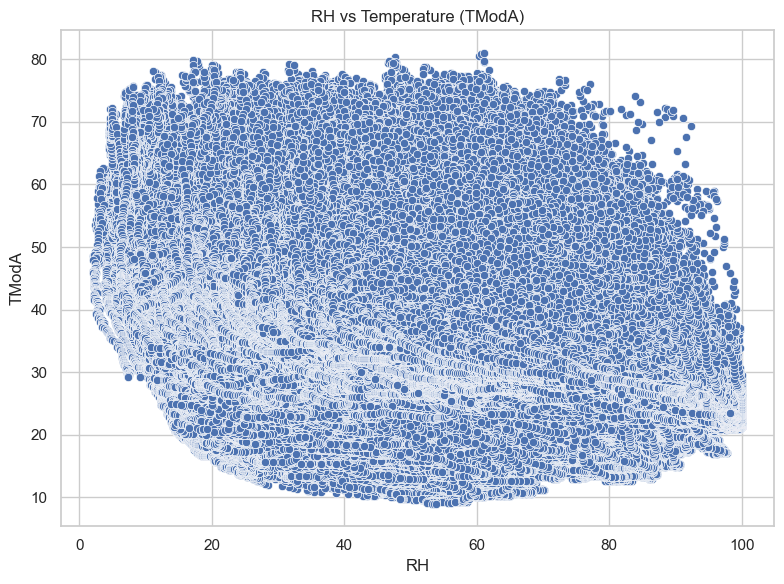

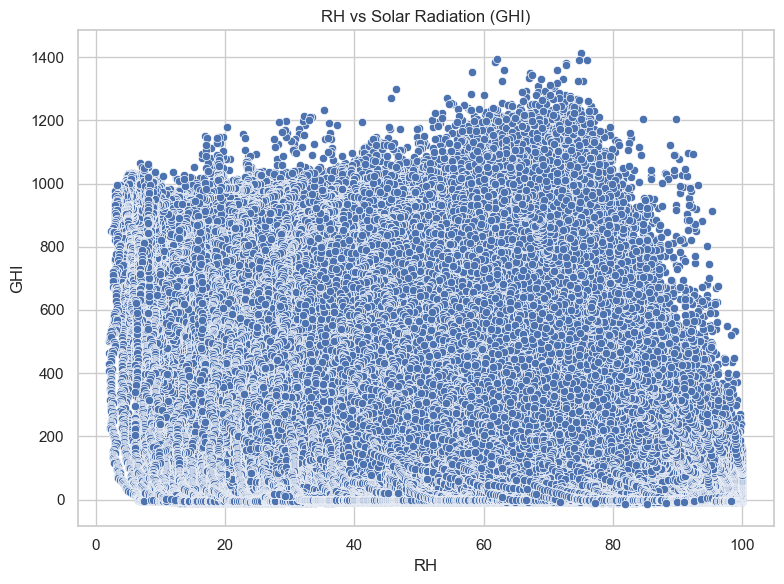

In [40]:
scatter_plot(benin_data, x="RH", y="TModA", title="RH vs Temperature (TModA)")
scatter_plot(benin_data, x="RH", y="GHI", title="RH vs Solar Radiation (GHI)")

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


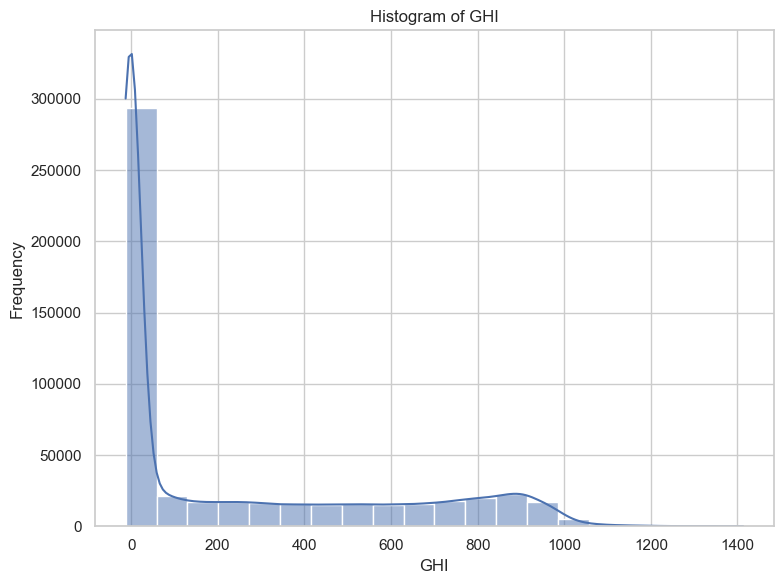

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


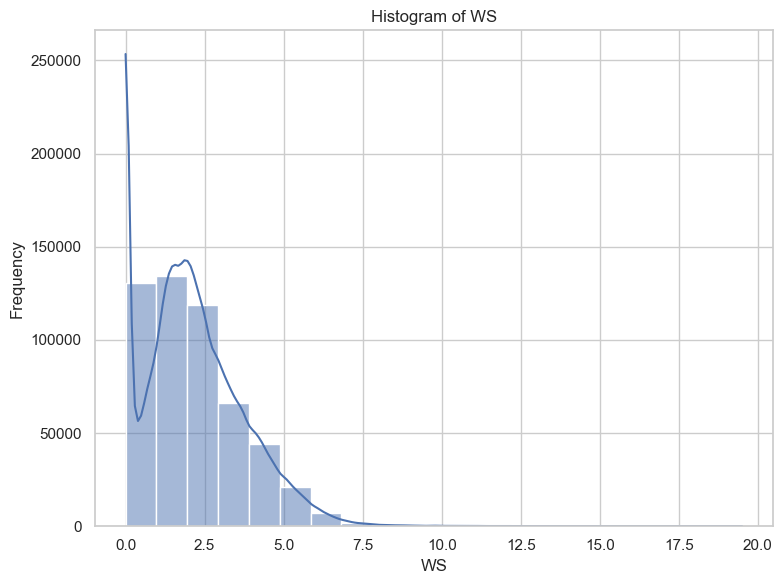

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


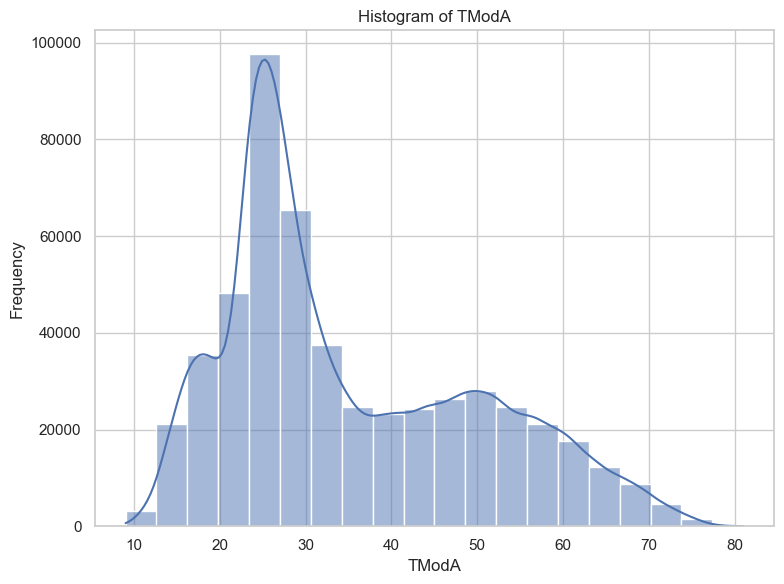

In [43]:
plot_histogram(benin_data, column="GHI")
plot_histogram(benin_data, column="WS")
plot_histogram(benin_data, column="TModA")

In [44]:
def bubble_chart(df, x, y, size, color=None, title="Bubble Chart"):
    """
    Creates a bubble chart for exploring relationships between variables.

    Args:
        df (pd.DataFrame): The dataset.
        x (str): Column name for the x-axis.
        y (str): Column name for the y-axis.
        size (str): Column name for bubble size.
        color (str, optional): Column name for bubble color. Defaults to None.
        title (str): Chart title.

    Returns:
        None
    """
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        x=df[x],
        y=df[y],
        s=df[size] * 100,  # Scale bubble size
        c=df[color] if color else None,
        alpha=0.6,
        cmap="viridis"
    )
    plt.colorbar(scatter, label=color) if color else None
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

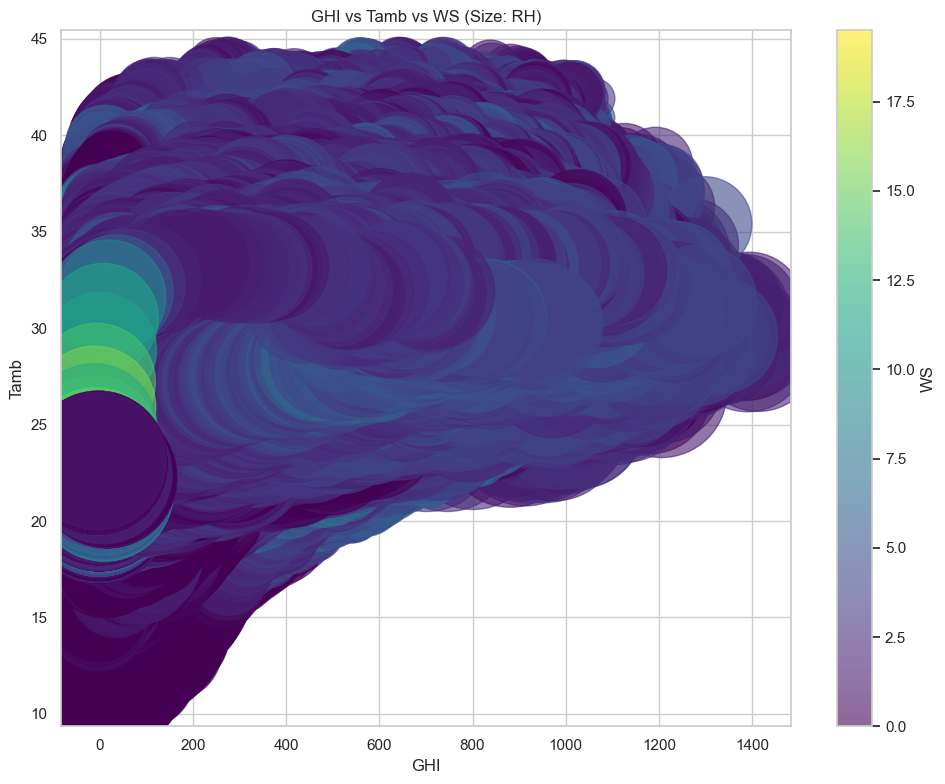

In [45]:
bubble_chart(benin_data, x="GHI", y="Tamb", size="RH", color="WS", title="GHI vs Tamb vs WS (Size: RH)")